In [14]:
#import networkx as nx
import osmnx as ox
from shapely import wkt
import math
import matplotlib.pyplot as plt


%matplotlib inline
ox.__version__

'1.3.0'

In [15]:
# El tesoso
# ISA
# Amsterdam
# Mall Zona 2
# Mall la visitación
# Clínica El Rosario
# La Vaquita (los balsos)
# Euro (la inferior)
# Mall del este
# Complex los balsos

lugares_poligono = {
    'Complex Los Balsos': [6.186898127000028, -75.56143294740268],
    'Mall Del Este': [6.198756717661721, -75.556393638567],
    'Amsterdam Plaza' : [6.202176172201083, -75.55510765722],
    'Euro Supermercados La Inferior': [6.199854351194308, -75.56472210973091],
    'Mall Zona 2': [6.1985640740178996, -75.56511452001308],
    'Mall La Visitación': [6.196673041613839, -75.56516852042641],
    'Complex Los Balsos 2': [6.186898127000028, -75.56143294740268],
}

Example of location on the map

In [16]:
location = ox.geocode("Centro Comercial El Tesoro, Medellín, Colombia")
#location = ox.geocode("ISA - Interconexión Eléctrica, Medellín, Colombia")
latitud = location[0]
longitud = location[1]

print("Latitud:", latitud)
print("Longitud:", longitud)

Latitud: 6.19702045
Longitud: -75.5591826240879


Defino los lugares externos del grafo (en este caso no los uso porque tomaré todo el Poblado)

In [17]:
#polygon_str = 'POLYGON(('
#for place in lugares_poligono.keys():
#    # Se debe poner (longitud, latitud)
#    polygon_str += str(lugares_poligono[place][1]) + ' ' + str(lugares_poligono[place][0]) + ', '

#polygon_str = polygon_str[:-2]
#polygon_str += '))'
#print(polygon_str)

## graph from polygon
#polygon = wkt.loads(polygon_str)

Se extrae la información

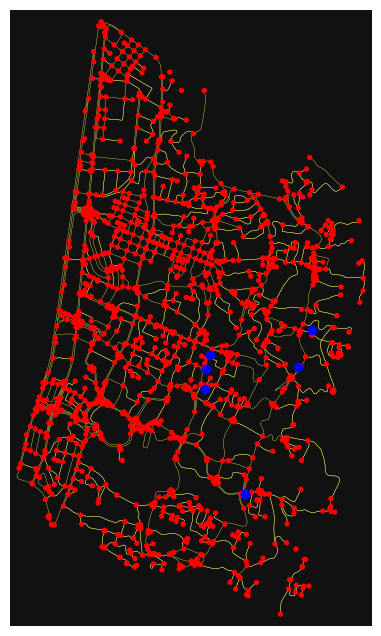

In [19]:
points = [tuple(coord) for coord in lugares_poligono.values()]

places = ['El poblado, Medellín, Colombia']
# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
GP = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(GP, edge_color="#FFFF5C", edge_linewidth=0.25, node_color='red', show=False)


# Plot the additional points with a different color
x, y = zip(*points)
ax.scatter(y, x, c='blue', marker='o')  # Change 'blue' to the desired color

# Show the plot
plt.show()


#GP = ox.graph_from_polygon(polygon, network_type='drive', truncate_by_edge=True, retain_all=True)
#fig, ax = ox.plot_graph(GP, edge_color="#FFFF5C", edge_linewidth=0.25, node_color='red')

Plot our interest places

In [20]:
GP.nodes

NodeView((309026271, 309026273, 309026274, 309026275, 309026276, 309026277, 309026943, 309026951, 309027094, 309027144, 309027146, 309027147, 309027618, 309027619, 309028163, 309028164, 309028165, 309028174, 309028176, 309028467, 309028468, 309028469, 313793549, 313793550, 313794892, 313795802, 313797071, 313799145, 313799181, 315062587, 315062799, 318384443, 318384455, 318386340, 318386343, 318387635, 324495345, 329578087, 329578093, 329581215, 329581220, 329582048, 330454282, 330454285, 330454289, 338171294, 339135755, 339135757, 339135760, 339135765, 339135767, 339135768, 339135769, 339135771, 339135775, 339137332, 339137333, 339137335, 339139374, 339139375, 339139376, 339139600, 339140372, 339140378, 339140384, 339140494, 339140856, 339140865, 339146225, 339146248, 339146605, 339152498, 339152501, 339153614, 339156160, 339266762, 339266774, 339266841, 339266843, 339266889, 339267812, 339268276, 339268282, 339268388, 339268782, 339268790, 339269160, 339269228, 339269246, 339269280, 

Se agregan las elevaciones de cada nodo y se calculan los ángulos
**Importante tener un archivo .tif dentro de la carpeta!!**

In [9]:
# Agregar elevaciones a los nodos del grafo
G = ox.add_node_elevations_raster(GP, '10s090w_20101117_gmted_mea075.tif')

# Calcular elevación de las aristas
for u, v, k, data in G.edges(keys=True, data=True):
    start_elev = G.nodes[u]['elevation']
    end_elev = G.nodes[v]['elevation']
    length = data['length']
    data['elevation'] = (start_elev + end_elev) / 2

# Calcular ángulos de elevación de las aristas
angles = dict()
for u, v, k, data in G.edges(keys=True, data=True):
    start_elev = G.nodes[u]['elevation']
    end_elev = G.nodes[v]['elevation']
    length = data['length']
    elevation = data['elevation']
    angle = math.atan2(end_elev - start_elev, length)
    angle = math.degrees(angle)
    angles[(u, v)] = angle
    #print(f"La arista ({u}, {v}) tiene un ángulo de elevación de {math.degrees(angle)} grados y una elevación de {elevation} metros")
    print(f"La arista ({u}, {v}) tiene un ángulo de elevación de {angle} grados y una elevación de {elevation} metros")

La arista (309026271, 404910004) tiene un ángulo de elevación de 0.0 grados y una elevación de 1521.0 metros
La arista (309026273, 393988726) tiene un ángulo de elevación de 0.0 grados y una elevación de 1536.0 metros
La arista (309026273, 338171294) tiene un ángulo de elevación de -0.6316321611762272 grados y una elevación de 1535.5 metros
La arista (309026274, 416048073) tiene un ángulo de elevación de 0.0 grados y una elevación de 1549.0 metros
La arista (309026274, 416048719) tiene un ángulo de elevación de -4.374381306067029 grados y una elevación de 1542.0 metros
La arista (309026275, 309026276) tiene un ángulo de elevación de 9.123096986535314 grados y una elevación de 1556.5 metros
La arista (309026276, 309026277) tiene un ángulo de elevación de 0.0 grados y una elevación de 1564.0 metros
La arista (309026276, 309028164) tiene un ángulo de elevación de 0.0 grados y una elevación de 1564.0 metros
La arista (309026277, 416130698) tiene un ángulo de elevación de 0.0 grados y una e

Histograma con los ángulos de elevación

In [10]:
data = angles.values()

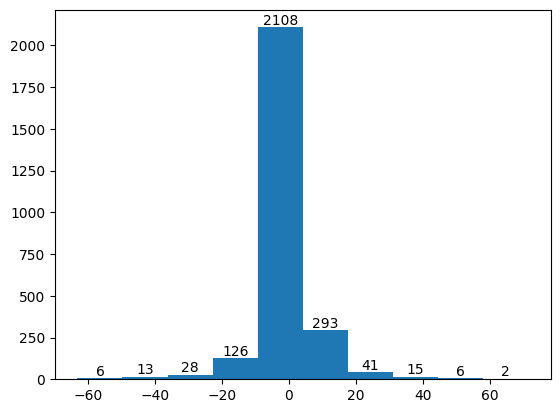

In [11]:
counts, edges, bars = plt.hist(data)
plt.bar_label(bars)
plt.show()

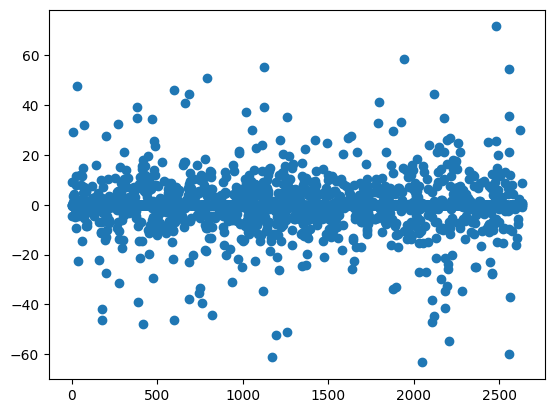

In [12]:
plt.plot(data, 'o')
plt.show()

In [13]:
max(data), min(data)

(71.57929445070624, -63.28045915419252)

In [14]:
ox.save_graphml(G, 'grafo_el_poblado.graphml')

#ox.save_graphml(G, 'grafo_de_interes.graphml')